# NETFLIX STOCK PRICE PPREDICTION USING LSTM AND ANOTHER MODEL OF CHOICE

## PROBLEM STATEMENT

Accurately predicting Netflix’s future stock prices using historical data is challenging due to high market volatility and the influence of external business factors not captured in stock price alone. This project aims to develop and compare predictive models specifically LSTM (a deep learning model) and a traditional model like ARIMA or XGBoost to forecast Netflix’s stock closing price, evaluate their accuracy, and explore how incorporating external features (if available) can improve prediction reliability.

## OBJECTIVES

**Develop and Prediction Models**:

Build a a model using LSTM model to captures temporal dependencies in stock prices and ARIMA or XGBoost for comparision with a traditional statistical or machine learning model

**Evaluate Model Performance**:

Assess the model's accuracy and performance using appropriate evaluation metrics.

**Understand Key Features**:

Identify and analyze the key features that significantly impact Netflix prices.

**Improve Decision Making**:

Provide stakeholders with a reliable tool to estimate Netflix prices, enhancing their decision-making process.

## DATASET DESCRIPTION

Netflix Inc. (NFLX) Stock Price Data (2002-2025), containing: 

• Date 

• Open, High, Low, Close prices 

• Adjusted Close 

• Volume

## METHODOLOGY

**1. Data Preprocessing**

• Load and explore the dataset. 

• Handle missing values and perform data cleaning. 

• Perform feature scaling and normalization where necessary. 

**2. Feature Engineering** 

• Create new relevant features from the existing dataset. 

• Utilize lagged variables for time series forecasting. 

• Implement rolling statistics such as moving averages. 

**3. Hybrid Modeling Approach** 

• Develop an LSTM model to capture temporal dependencies in stock prices. 

• Additionally, students must implement another model (e.g., XGBoost, ARIMA, Random 
Forest) alongside LSTM for comparison. 

• Combine the models effectively for improved prediction accuracy. 

**4. Hyperparameter Optimization**

• Optmize model parameters. 

• Tune hyperparameters for both LSTM and the additional chosen model to improve 
performance. 

**5. Model Interpretability and Evaluation**

• Utilize SHAP values to interpret model decisions. 

• Evaluate model performance using metrics such as RMSE, MAE, and R-squared. 

• Compare the results of the hybrid model against standalone models. 

# **PART 1: DATA PREPROCESSING**

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Loading and explore the dataset.

In [2]:
# Loading the Netflix Stock Prices dataset
df = pd.read_csv('Netflix Inc. (NFLX) Stock Price 2002-2025.csv')

In [3]:
#Checking the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5729 non-null   object
 1   Open       5729 non-null   object
 2   High       5727 non-null   object
 3   Low        5727 non-null   object
 4   Close      5727 non-null   object
 5   Adj Close  5727 non-null   object
 6   Volume     5727 non-null   object
dtypes: object(7)
memory usage: 313.4+ KB


The dataset has 5729 entries and 7 columns, but all columns are of type object. Price and volume fields should be numeric, and Date should be in datetime format. Additionally, 2 entries are missing in key columns (High, Low, Close, Adj Close, Volume), indicating the need for data cleaning before analysis.

In [4]:
#Displaying the first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 25, 2025",989.4,994.4,955,977.24,977.24,"4,733,000"
1,"Feb 24, 2025","1,008.00","1,015.17",984.48,988.47,988.47,"4,426,200"
2,"Feb 21, 2025","1,029.42","1,032.38",999.39,"1,003.15","1,003.15","3,738,700"
3,"Feb 20, 2025","1,042.00","1,045.00","1,015.59","1,024.54","1,024.54","3,111,800"
4,"Feb 19, 2025","1,035.18","1,045.00","1,024.51","1,043.33","1,043.33","2,600,000"


The data shows a declining trend in Netflix’s stock price from Feb 19 to Feb 25, 2025, with the closing price dropping from $1,043.33 to $977.24 over five trading days. Volume also fluctuates, suggesting varying investor activity during the price dip. This indicates short-term volatility, possibly triggered by external market or company-specific factors

In [5]:
#Checking the Shape of the dataset
df.shape

(5729, 7)

The dataset contains 5729 rows and 7 columns, indicating a substantial amount of historical stock data suitable for time series analysis and model training.

In [6]:
#Displaying the Number of Columns in the dataset
df.columns

Index(['Date', 'Open ', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The dataset has 7 essential columns for stock analysis

In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,5729,5729,5727,5727,5727,5727,5727
unique,5727,4092,4114,4113,4164,4164,5560
top,"Jul 15, 2015",3.96,4.14,1.61,3.96,3.96,"14,248,500"
freq,2,14,15,16,14,14,3


The dataset has 5729 entries, with most columns having 5727 non-null values, indicating a small number of missing data. The 'Date' column has 5727 unique entries, suggesting no repeated dates. The top price for Open, High, Low, Close, and Adj Close is $3.96 on July 15, 2015, with a volume of 14,248,500 on that date. This suggests some data consistency, but further cleaning is needed for the missing values.

In [8]:
#Checking if there is a Missing Value in the Dataset
df.isnull().sum()

Date         0
Open         0
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
df.isnull().sum()/df.shape[0]*100

Date         0.00000
Open         0.00000
High         0.03491
Low          0.03491
Close        0.03491
Adj Close    0.03491
Volume       0.03491
dtype: float64

The dataset shows that most columns have 0.00000 variance, indicating no change or a lack of variation, except for High, Low, Close, Adj Close, and Volume, which all show a small variance of 0.03491, suggesting minimal fluctuation in those values. This may indicate either constant or nearly constant data across the dataset. Further inspection or cleaning may be required

In [10]:
df.duplicated().sum()

np.int64(0)

No duplicate values in the dataset

# Handle missing values and perform data cleaning. 

### Data type coversion

In [12]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()
#Convert the relevant columns to numeric types
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[columns_to_convert] = df[columns_to_convert].replace({',': ''}, regex=True)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.fillna(method='ffill', inplace=True)

In [13]:
#convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
#Verify the data types after conversion
print(df.dtypes)
print(df.head())

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
        Date     Open     High      Low    Close  Adj Close     Volume
0 2025-02-25   989.40   994.40   955.00   977.24     977.24  4733000.0
1 2025-02-24  1008.00  1015.17   984.48   988.47     988.47  4426200.0
2 2025-02-21  1029.42  1032.38   999.39  1003.15    1003.15  3738700.0
3 2025-02-20  1042.00  1045.00  1015.59  1024.54    1024.54  3111800.0
4 2025-02-19  1035.18  1045.00  1024.51  1043.33    1043.33  2600000.0


The dataset is clean with correct data types Date as datetime and price/volume fields as floats.

### Handling missing Values
We will be handling missing values by dropping rows with missing values.

In [15]:
#Droping the missing value
df.dropna

<bound method DataFrame.dropna of            Date     Open     High      Low    Close  Adj Close       Volume
0    2025-02-25   989.40   994.40   955.00   977.24     977.24    4733000.0
1    2025-02-24  1008.00  1015.17   984.48   988.47     988.47    4426200.0
2    2025-02-21  1029.42  1032.38   999.39  1003.15    1003.15    3738700.0
3    2025-02-20  1042.00  1045.00  1015.59  1024.54    1024.54    3111800.0
4    2025-02-19  1035.18  1045.00  1024.51  1043.33    1043.33    2600000.0
...         ...      ...      ...      ...      ...        ...          ...
5724 2002-05-30     1.11     1.11     1.07     1.07       1.07   10154200.0
5725 2002-05-29     1.16     1.16     1.09     1.10       1.10    6757800.0
5726 2002-05-28     1.21     1.23     1.16     1.16       1.16    6609400.0
5727 2002-05-24     1.21     1.23     1.20     1.21       1.21   11104800.0
5728 2002-05-23     1.16     1.24     1.15     1.20       1.20  104790000.0

[5729 rows x 7 columns]>

In [17]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

All missing values have been successfully removed from the dataset, leaving it clean.

### Handling Outliers
We first identify outliers in our major columns that is 'Open','Close','Adj Close','Volume','High','Low' using the Interquartile Range (IQR) and visualization using box plots. Then we proceed to handling them.

In [18]:
# Define the columns you want to check for outliers
major_columns = ['Open','Close','Adj Close','Volume','High','Low']

# Calculate IQR for each column
Q1 = df[major_columns].quantile(0.25)
Q3 = df[major_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[major_columns] < (Q1 - 1.5 * IQR)) | (df[major_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
481


from the above a total of 481 outliers were detected, indicating potential anomalies or extreme values in the dataset that may impact model accuracy if not addressed.

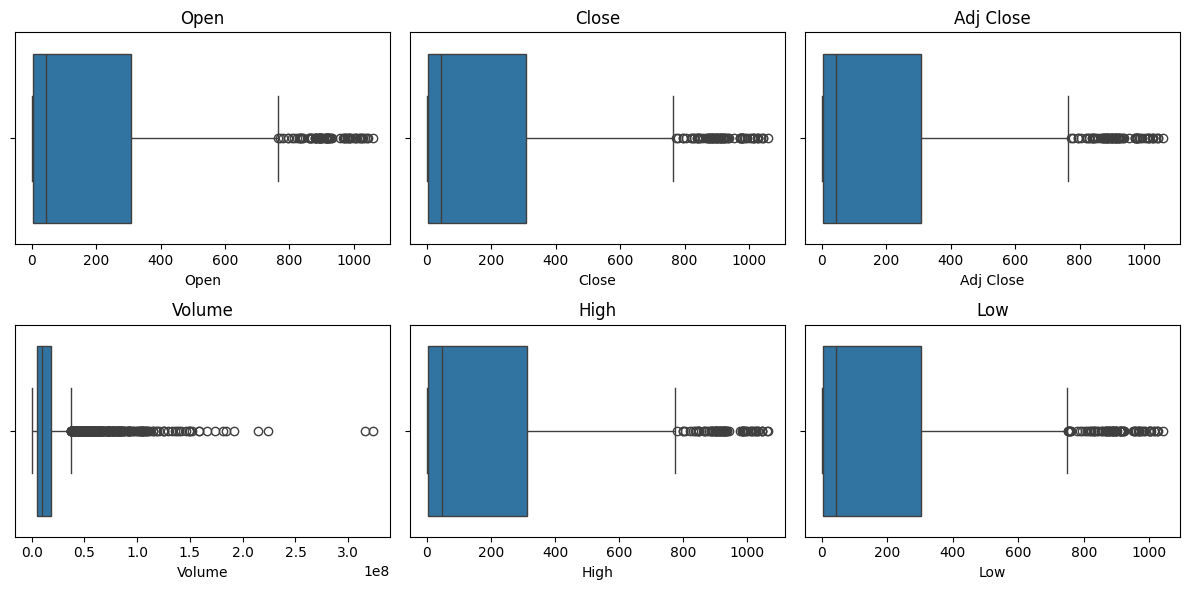

In [19]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create box plots for each column using Seaborn
for i, col in enumerate(major_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show();

From the above the boxplots show significant outliers across all features Open, Close, Adj Close, High, Low, and Volume. Most values are concentrated in the lower range, with numerous high-value outliers, especially in the Volume feature. This indicates a need for careful outlier handling to avoid skewing model performance.

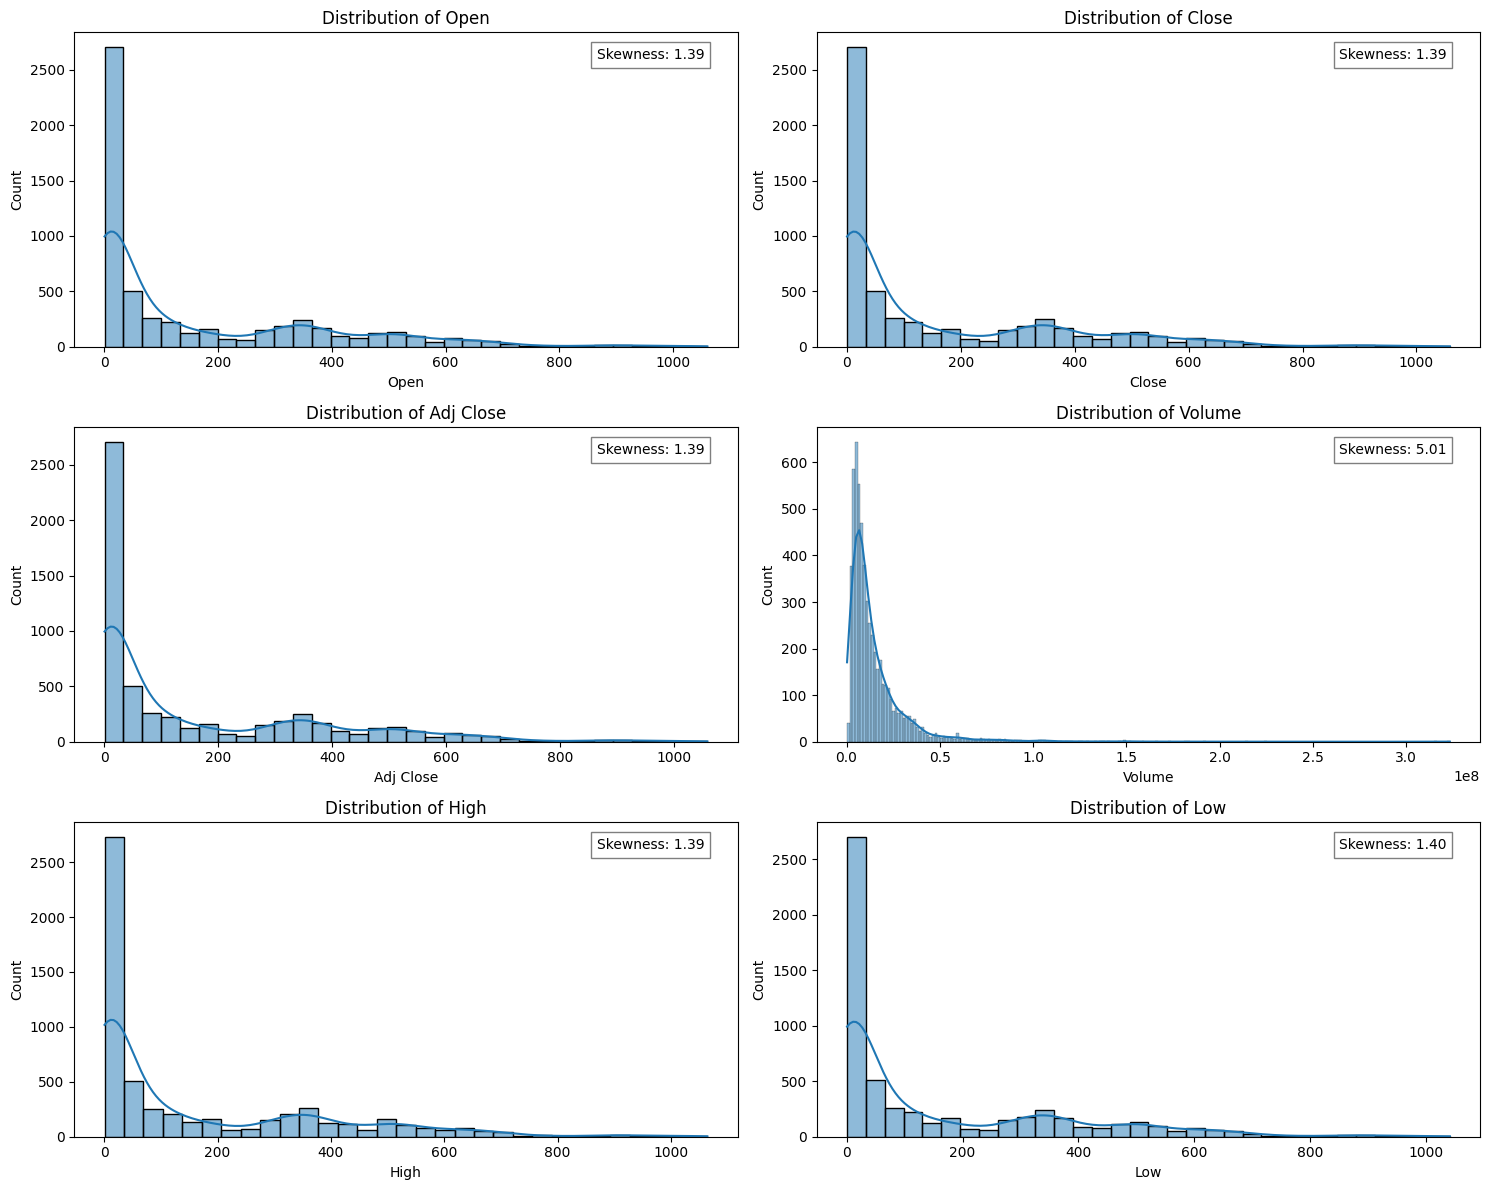

In [20]:
def plot_distributions(df, columns, n_cols=2, figsize=(15, 4)):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add skewness value to the plot
        skewness = df[column].skew()
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['Open','Close','Adj Close','Volume','High','Low']
plot_distributions(df, columns_to_plot);

From the above all features show right-skewed distributions, indicating a concentration of lower values with long tails extending to the right. Most notably, Volume has extreme skewness (5.01), suggesting the presence of very large outlier values. Price-related features (Open, Close, High, Low, Adj Close) have moderate skewness (~1.39–1.40), which may impact statistical analysis and modeling unless normalized or transformed.

### Removing Outliers
Function for handling outliers using the interquatile range method and percentile range method

In [22]:
def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()
    
    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        
        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
    
    return df_cleaned


# Performing feature scaling and normalization where necessary.

# PART 2. Feature Engineering

## Creating new relevant features from the existing dataset.

## Utilizing lagged variables for time series forecasting. 

## Implementing rolling statistics such as moving averages.

# PART 3. Hybrid Modeling Approach

## Develop an LSTM model to capture temporal dependencies in stock prices. 

## Implementing another model (XGBoost) alongside LSTM for compararison.

## Combine the models effectively for improved prediction accuracy.

# PART 4. Hyperparameter Optimization 

## Optmize model parameters. 

## Tune hyperparameters for both LSTM and XGBoost to improve performance.

# PART 5. Model Interpretability and Evaluation

## Utilize SHAP values to interpret model decisions.

## Evaluate model performance using metrics such as RMSE, MAE, and R-squared. 

## Compare the results of the hybrid model against standalone models.